In [1]:
#Predicting Fraudulent credit card transactions using neural network
# dataset found at https://www.kaggle.com/mlg-ulb/creditcardfraud/
#importing necessary packages
import os
os.chdir(r"C:\Users\Collin\Documents\collins documents\Regis Homework\Machine Learning wk 5")
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\

In [2]:
#taking a look at the raw dataset
df =  pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


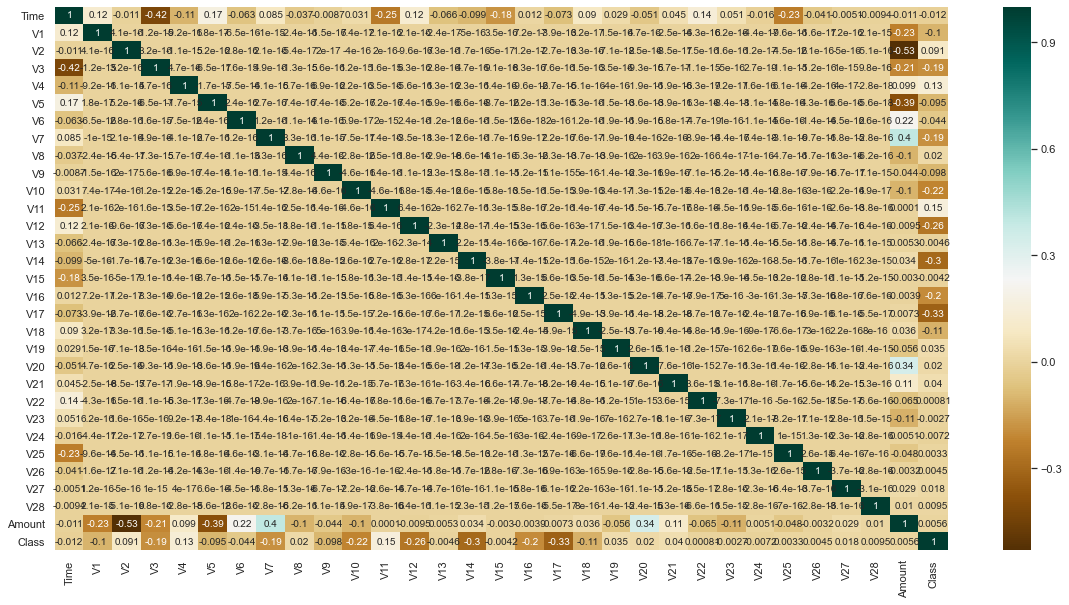

In [3]:
#checking variable correlation
plt.figure(figsize=(20,10))
corr= df.corr()
sns.heatmap(corr,cmap='BrBG',annot=True)
corr
#credit to Towards data science "https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14"

(array([4.30000e+01, 1.17000e+02, 1.89000e+02, 2.81889e+05, 2.56900e+03]),
 array([-25.16279937, -18.27953425, -11.39626912,  -4.513004  ,
          2.37026113,   9.25352625]),
 <BarContainer object of 5 artists>)

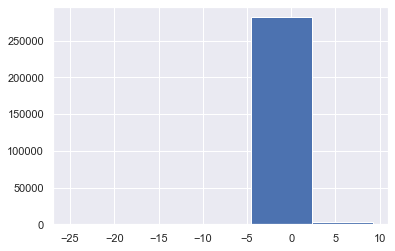

In [4]:
#Looking at the distribution for the most correlated variable to the outcome variable
plt.hist(df['V17'], bins=5)

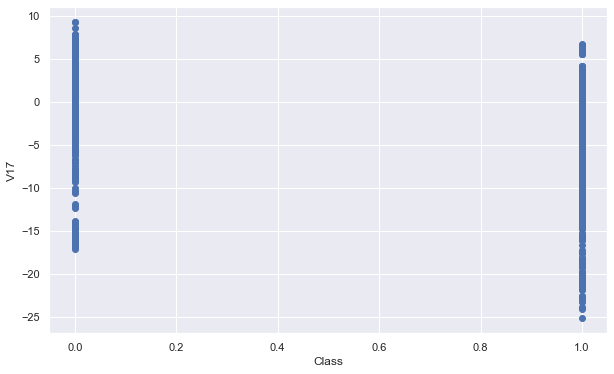

In [5]:
#Looking at a scatterplot between the outcome variable and the independent variable that has the highest correlation
#It looks like when the variable is negative to a certain point the outcome is a 1
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Class'], df['V17'])
ax.set_xlabel('Class')
ax.set_ylabel('V17')
plt.show()

Text(0, 0.5, 'Frequncy')

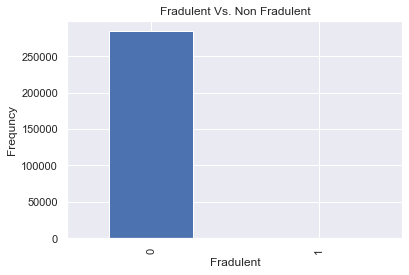

In [6]:
#Looking at distribution of 1's to 0's
count_classes = pd.value_counts(df['Class'], sort = False)
count_classes.plot (kind='bar')
plt.title ("Fradulent Vs. Non Fradulent")
plt.xlabel ("Fradulent")
plt.ylabel ("Frequncy")

In [7]:
#Getting the fraud count because the graph couldn't show it
count_fraud = df.loc[df['Class'] == 1]
len(count_fraud)



492

In [8]:
# Scaling the amount column to match the others
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape (-1,1))

In [9]:
df = df.drop (['Time', 'Amount'], axis = 1)

In [10]:
#splitting up the outcome variables to perform undersampling
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
count_nonfraud = df.loc[df['Class'] != 1]

In [11]:
fraud_indices = np.array (df[df.Class==1].index)
normal_indices = np.array (df[df.Class==0].index)

In [12]:
#sources for undersampling decision
#https://www.kaggle.com/jdelamorena/recall-97-by-using-undersampling-neural-network
#https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/
#randomly selecting observations to keep for non-fradulent transactions to balance out the dataset
random_normal_indices = np.random.choice (normal_indices, 492, replace = False )

In [13]:
#reconstructing dataset
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [14]:
under_sample_data = df.iloc[under_sample_indices,:]

In [15]:
X = under_sample_data.iloc [:, under_sample_data.columns != 'Class']
y = under_sample_data.iloc [:, under_sample_data.columns == 'Class']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [18]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
55401,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,-0.550545,...,-0.042515,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,-0.349231
208979,-0.755770,-1.015130,-0.060060,-1.536950,-2.090196,1.600761,2.048550,-0.197622,-0.995850,-0.092114,...,0.250551,-0.083428,-0.272002,0.603779,0.255435,-0.883535,-0.624999,0.271163,0.128013,1.971698
12070,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,-13.002709,...,0.993585,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,-0.349231
118308,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,-1.039638,...,-0.115282,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,-0.232727
63421,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,-6.246243,...,0.814710,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,0.046539


In [40]:
#starting with MLPClassifier for neural net
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(max_iter=50, validation_fraction= .03, batch_size=72, verbose = 2)
mlp1.fit(X_train, y_train)

C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.71033732
Iteration 2, loss = 0.46071140
Iteration 3, loss = 0.39962279
Iteration 4, loss = 0.34583834
Iteration 5, loss = 0.30546696
Iteration 6, loss = 0.27103874
Iteration 7, loss = 0.24464640
Iteration 8, loss = 0.22419985
Iteration 9, loss = 0.20748948
Iteration 10, loss = 0.19324758
Iteration 11, loss = 0.18171553
Iteration 12, loss = 0.17120829
Iteration 13, loss = 0.16302109
Iteration 14, loss = 0.15529766
Iteration 15, loss = 0.14866805
Iteration 16, loss = 0.14254961
Iteration 17, loss = 0.13728480
Iteration 18, loss = 0.13230669
Iteration 19, loss = 0.12811087
Iteration 20, loss = 0.12435182
Iteration 21, loss = 0.12072509
Iteration 22, loss = 0.11760203
Iteration 23, loss = 0.11501490
Iteration 24, loss = 0.11226883
Iteration 25, loss = 0.10953004
Iteration 26, loss = 0.10714301
Iteration 27, loss = 0.10485158
Iteration 28, loss = 0.10289889
Iteration 29, loss = 0.10072523
Iteration 30, loss = 0.09870685
Iteration 31, loss = 0.09721323
Iteration 32, los

C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=72, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.03, verbose=2, warm_start=False)

In [41]:
#checking preformance of the model
predictions1 = mlp1.predict(X_test)
print(confusion_matrix(y_test,predictions1))  
print(classification_report(y_test,predictions1))

[[163   4]
 [ 12 146]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       167
           1       0.97      0.92      0.95       158

    accuracy                           0.95       325
   macro avg       0.95      0.95      0.95       325
weighted avg       0.95      0.95      0.95       325



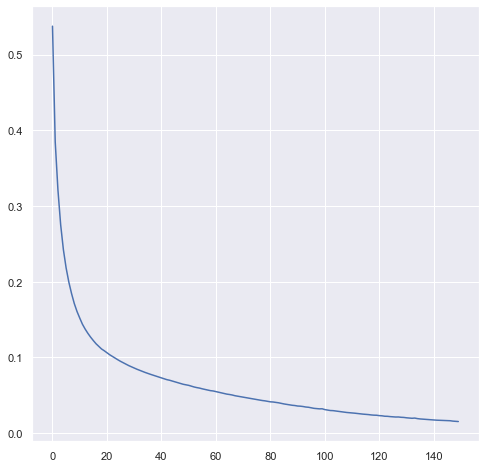

In [36]:
#Showing loss curve, the rate of change in the loss curve seems to hit its peak near 20 iterations
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(mlp1.loss_curve_, )
plt.show()

In [37]:
#Running a different neural net using keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [24]:
#running sequential model
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
model = Sequential()

In [25]:
#Adding layers to model
model.add(layers.Dense(29, input_dim=29, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=72, verbose=0)

In [26]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


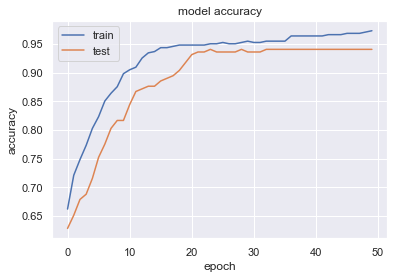

In [27]:
#Plotting accuracy for training and test
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

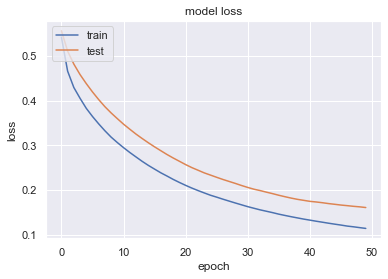

In [28]:
#Plotting loss for Training and test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#Showing model accuracy
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))



Train Accuracy: 0.962, Test Accuracy: 0.935


In [88]:
predicted = model.predict(X_test)

In [90]:
#converting to 1's and zero's for binary classification
predicted = np.where(predicted >= .5, 1, 0)
print(predicted)

[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]


In [93]:
#Looking at model performance
print(confusion_matrix(y_test,predicted)) 
print(classification_report(y_test,predicted))

[[160   7]
 [ 14 144]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       167
           1       0.95      0.91      0.93       158

    accuracy                           0.94       325
   macro avg       0.94      0.93      0.94       325
weighted avg       0.94      0.94      0.94       325



For the sequential model I chose 50 Epochs because the loss curve starts to go flat for the test set at that point, the model performs pretty well with precision and recall above 90% for both fraud and non-fraudulent transactions.  I used cross entropy for the loss method for binary classification and stochastic gradient descent for model optimization which to my understanding uses partial derivatives for each variable to minimize loss. 